# Network science assignment - 1
-----------
 - Submitted by : Deepak Sharma
 - Roll no. : PhD18205

#### Basic network analysis

Network adjacency matrix, dimension: 5 X 5 = 25
[[0 0 0 1 0]
 [1 1 0 0 1]
 [1 1 1 0 1]
 [0 1 0 1 1]
 [1 0 0 0 1]]
There are total 13 links in this 5 X 5 network matrix
No. of self loops =  4
-----------------------------------------------------------
Network adjacency matrix without self-loops, dimension: 5 X 5 = 25
[[0 0 0 1 0]
 [1 0 0 0 1]
 [1 1 0 0 1]
 [0 1 0 0 1]
 [1 0 0 0 0]]
Now there are total 9 links in this 5 X 5 network matrix
-----------------------------------------------------------
Edge list representation of demo network, dimension: 9 X 2 = 18 
This representation can be memory efficient if network is sparse
[[0 3]
 [1 0]
 [1 4]
 [2 0]
 [2 1]
 [2 4]
 [3 1]
 [3 4]
 [4 0]]
-----------------------------------------------------------
Incidence matrix representation for this demo network, dimension: 5 X 9 = 45
[[1 1 0 1 0 0 0 0 1]
 [0 1 1 0 1 0 1 0 0]
 [0 0 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 1 0 1 1]]
-----------------------------------------------------------
Dr

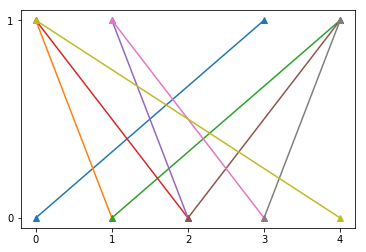

-----------------------------------------------------------
Drawing graph representation of network using Adjacency matrix


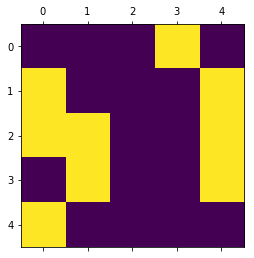

Drawing network structure using NetworkX
-----------------------------------------------------------


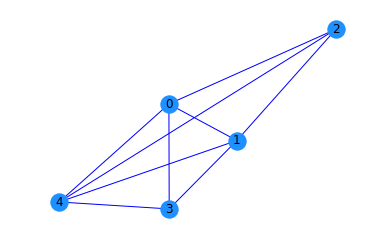

In [2]:
import numpy as num
import networkx as netx
import matplotlib.pyplot as plot

def output_separator():
    print("-----------------------------------------------------------")

# Create variables
nodes = 5 # To create a very small network - For demo purpose only
links = 0 # Number of links in a network   - For demo purpose only

# Represent network in terms of adjacency matrix
my_net = num.random.choice([0, 1], size=(nodes,nodes))

# Count number of links in demo network
for i in range(0, nodes):
    for j in range(0, nodes):
        if(my_net[i][j] == 1):
            links = links + 1

# Print network structure
print("Network adjacency matrix, dimension:",nodes,"X",nodes,"=",nodes * nodes)
print(my_net)
print("There are total", links, "links in this", nodes, "X", nodes, "network matrix")

# Find no. of self loops
loop_counter = 0
for r in range(0, nodes):
    for c in range(0,nodes):
        if(r == c):
            if(my_net[r][c] == 1):
                loop_counter += 1
print("No. of self loops = ", loop_counter)
output_separator()

# Discard self-loops
num.fill_diagonal(my_net,0)

# Re-count number of links
links = 0
for i in range(0, nodes):
    for j in range(0, nodes):
        if(my_net[i][j] == 1):
            links = links + 1

# Print network adjacency matrix after discarding self-loops
print("Network adjacency matrix without self-loops, dimension:",nodes,"X",nodes,"=",nodes * nodes)
print(my_net)
print("Now there are total", links, "links in this", nodes, "X", nodes, "network matrix")
output_separator()
# Edge list representation of demo network

my_net_edge_list = num.empty([links,2],dtype=int)
i = 0
for r in range(0, nodes):
    for c in range(0, nodes):
        if(my_net[r][c] == 1):
            my_net_edge_list[i][0] = r
            my_net_edge_list[i][1] = c
            i = i + 1

# Print edge-list representation of network
print("Edge list representation of demo network, dimension:",links,"X",2,"=",links * 2,"\nThis representation can be memory efficient if network is sparse")
print(my_net_edge_list)
output_separator()

# Incidence matrix representation of network
incid_mat = num.random.choice([0], size = (nodes, links))
j = 0
for r in range(0,nodes):
    for c in range(0,nodes):
        if(my_net[r][c] == 1):
            if(r==c):
                incid_mat[r][j] = 2
                j = j + 1
            else:
                incid_mat[r][j] = 1
                incid_mat[c][j] = 1
                j = j + 1
print("Incidence matrix representation for this demo network, dimension:",nodes,"X",links,"=",nodes * links)
print(incid_mat)
output_separator()

# Draw network structure in the form of graph

# Using edge list representation
x = num.empty([nodes,2],dtype=int)
y = num.empty([nodes,2],dtype=int)
for i in range(0,nodes):
    x[i][0] = i
    x[i][1] = 0
    y[i][1] = 1
    y[i][0] = i

print("Drawing graph representation of network using Edge list")
for i in range(0,links):
    for r in range(0,nodes):
        for c in range(0,nodes):
            if(my_net_edge_list[i][0] == x[r][0]):
                if(my_net_edge_list[i][1] == y[c][0]):
                    plot.plot([x[r][0], y[c][0]], [0, 1],marker = '^')
plot.axis('on')
plot.yticks([0,1])
plot.xticks(range(0,nodes))
plot.show()
output_separator()

# Network representation using adjacency matrix
print("Drawing graph representation of network using Adjacency matrix")
plot.matshow(my_net)
plot.show()

# Draw network using NetworkX
G = netx.from_numpy_matrix(my_net)
%matplotlib inline
plot.axis('off')
print("Drawing network structure using NetworkX")
netx.draw_networkx(G, edge_color = 'blue', node_color = 'dodgerblue')
#netx.draw_circular(G) # Draw a circular network
output_separator()
